<a href="https://colab.research.google.com/github/daraadeniyi3116-create/ACCESS-6.0-SAP-Data-Science-Track/blob/main/Week_3_session_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
import os

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
    print("Mounted!")
else:
    print("Drive is already mounted.")

Drive is already mounted.


In [7]:
df = pd.read_csv('/content/Warehouse_and_Retail_Sales_Cleaned.csv')


sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Data Loaded. Ready to visualize!")

✅ Data Loaded. Ready to visualize!


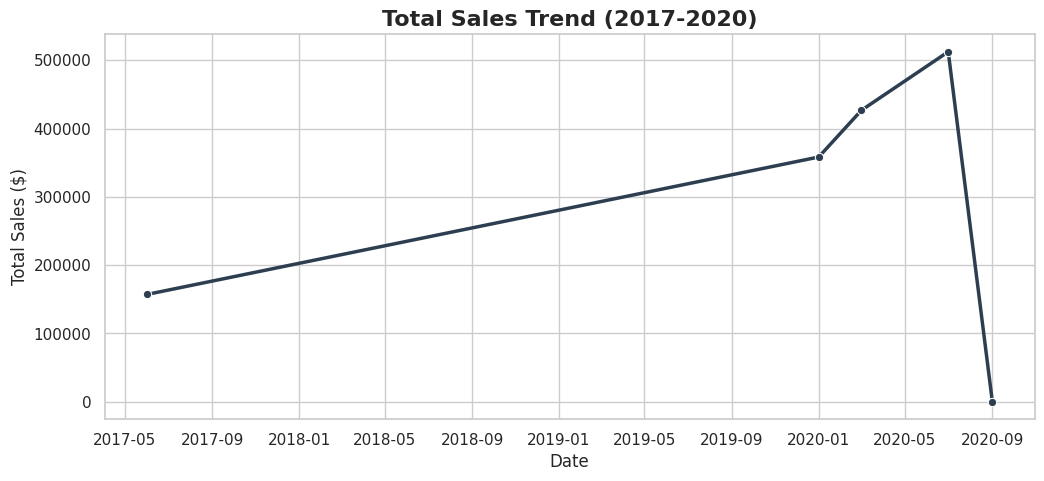

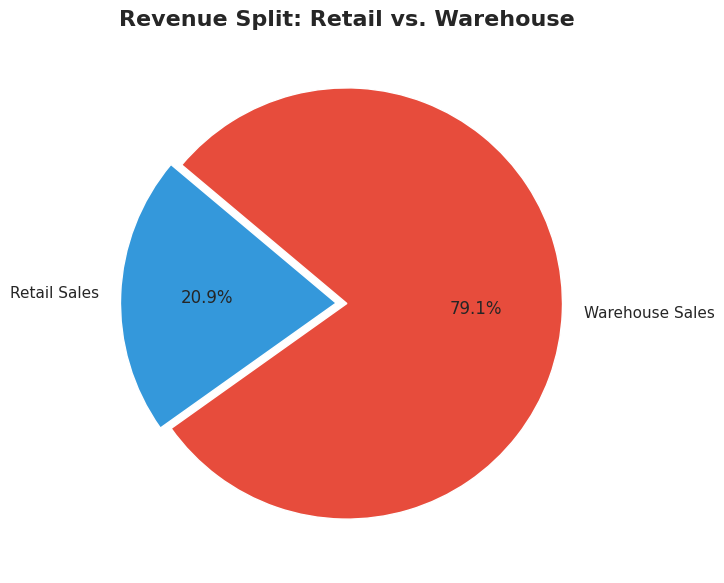

/tmp/ipython-input-2058644243.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items, x='TOTAL_SALES', y='ITEM TYPE', palette='viridis')


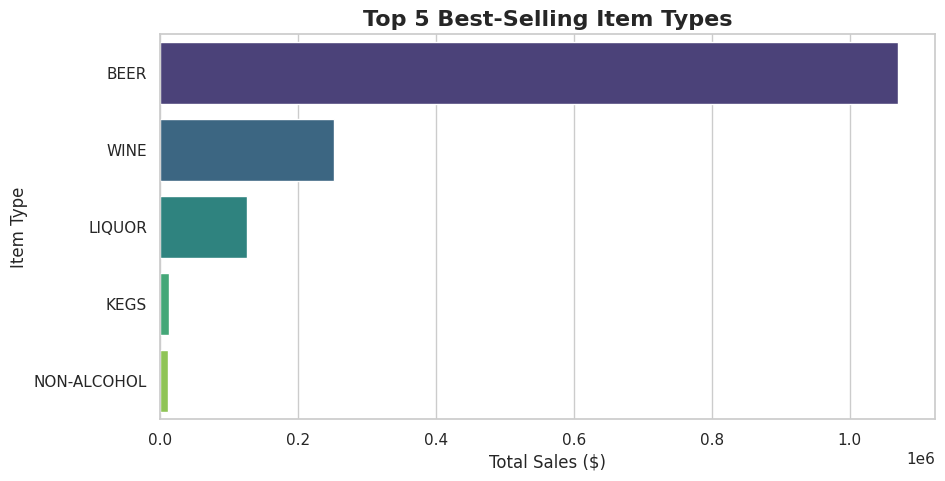

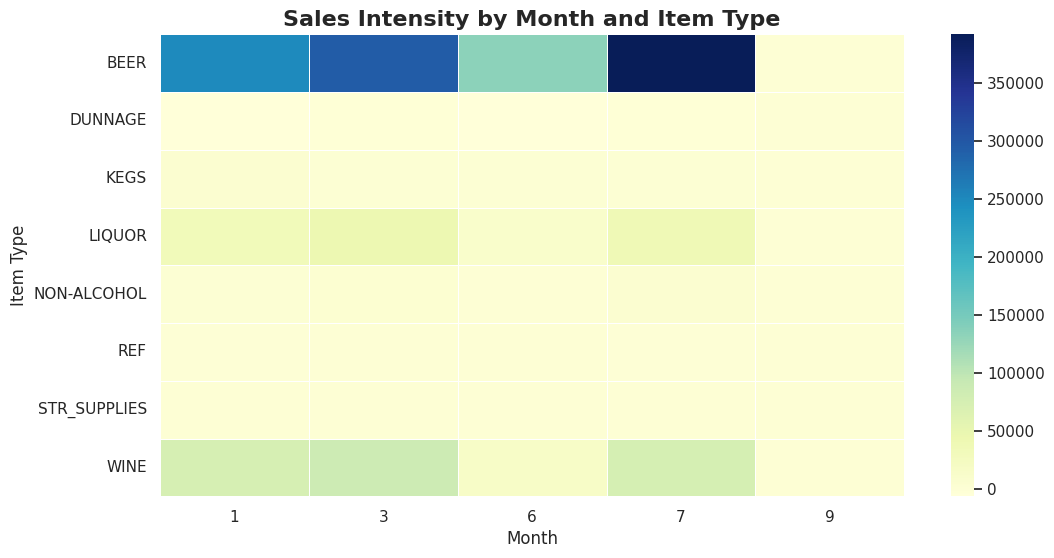

In [10]:
# --- VISUAL 1: The Big Picture (Sales Trend Over Time) ---
# Story: "Is our business growing?"
# We need to group by Year and Month to see the timeline.
monthly_sales = df.groupby(['YEAR', 'MONTH'])['TOTAL_SALES'].sum().reset_index()
# Create a proper 'Date' column for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Date', y='TOTAL_SALES', marker='o', linewidth=2.5, color='#2c3e50')
plt.title('Total Sales Trend (2017-2020)', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()


# --- VISUAL 2: The Channel Battle (Retail vs Warehouse) ---
# Story: "Who is our biggest customer: Individuals or Bulk Buyers?"
total_retail = df['RETAIL SALES'].sum()
total_warehouse = df['WAREHOUSE SALES'].sum()

plt.figure(figsize=(7, 7))
plt.pie([total_retail, total_warehouse], labels=['Retail Sales', 'Warehouse Sales'],
        autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=140, explode=(0.05, 0))
plt.title('Revenue Split: Retail vs. Warehouse', fontsize=16, fontweight='bold')
plt.show()


# --- VISUAL 3: The Product Champions (Top Item Types) ---
# Story: "What are we actually selling?"
top_items = df.groupby('ITEM TYPE')['TOTAL_SALES'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_items, x='TOTAL_SALES', y='ITEM TYPE', palette='viridis')
plt.title('Top 5 Best-Selling Item Types', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Item Type', fontsize=12)
plt.show()


# --- VISUAL 4: The Heatmap (Seasonality) ---
# Story: "When do different items sell the most?"
# We pivot the data to have Months as columns and Items as rows
heatmap_data = df.groupby(['ITEM TYPE', 'MONTH'])['TOTAL_SALES'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Sales Intensity by Month and Item Type', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Item Type', fontsize=12)
plt.show()